In [ ]:
from AlgorithmImports import *

class RSIBreakoutStrategy(QCAlgorithm):
    def Initialize(self):
        self.SetStartDate(2022, 9, 1)
        self.SetEndDate(2023, 12, 1)
        self.SetCash(100000)
        self.symbol = self.AddEquity("SPY", Resolution.Daily).Symbol        
        self.rsi = self.RSI(self.symbol, 14, MovingAverageType.Wilders, Resolution.Daily)
        self.invested = False

    def OnData(self, data):
        if not self.rsi.IsReady:
            return
        rsi_value = self.rsi.Current.Value
       
        if rsi_value < 30 and not self.invested:
            self.SetHoldings(self.symbol, 1)  
            self.invested = True
            self.Debug(f"Bought {self.symbol} at RSI {rsi_value}")
        
        elif rsi_value > 70 and self.invested:
            self.Liquidate(self.symbol)
            self.invested = False
            self.Debug(f"Sold {self.symbol} at RSI {rsi_value}")


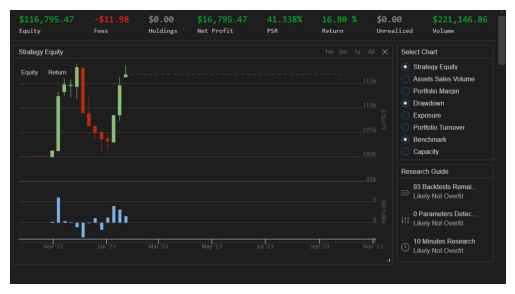

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = "C:/Users/meets/QUANT/CODE/QUANTCONNECT/RSI_30-70.jpg"
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off') 
plt.show()